<a href="https://colab.research.google.com/github/mangeshshinde8605/ms/blob/main/INSAID_task_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv(r'/content/gdrive/MyDrive/Colab Notebooks/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

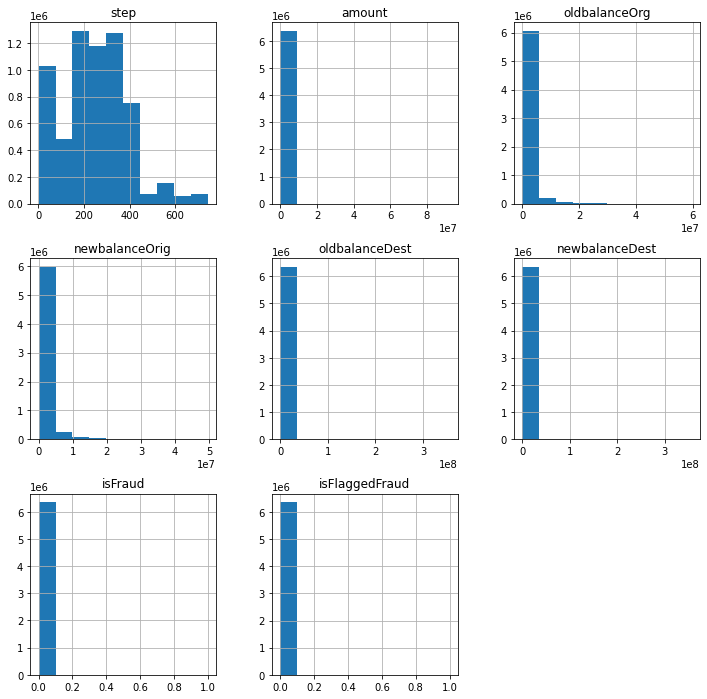

In [ ]:
# Histogram to show distribution of Data
df.hist(figsize=(12,12))
plt.show()

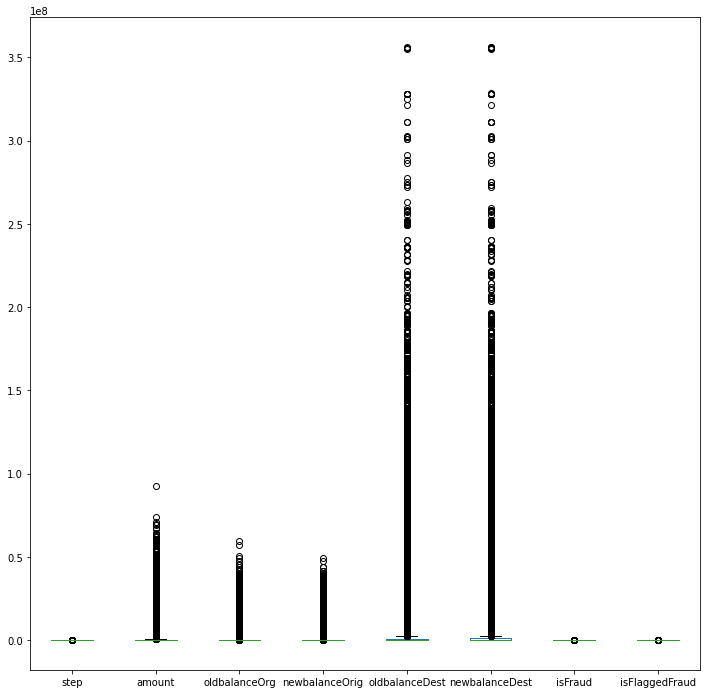

In [ ]:
# Box plot to show if outliers are present

df.plot(kind = 'box', figsize = (12,12))

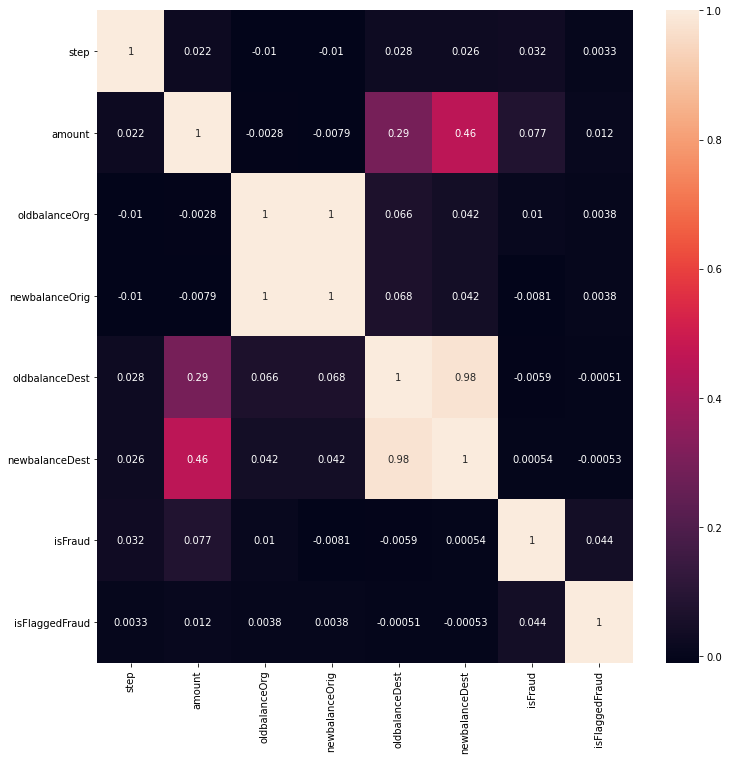

In [ ]:
# Let's check correlation between different variables

sns.heatmap(df.corr(), annot = True)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

oldbalanceOrg and newbalanceOrg are highly correlated and oldbalanceDest and newbalanceDest are also highly correlated. So we will remove oldbalanceDest and odlbalanceOrg.

In [ ]:
df['transamountOrg'] = df['oldbalanceOrg']-df['newbalanceOrig']
df['transamountDest'] = df['newbalanceDest']-df['oldbalanceDest']

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transamountOrg,transamountDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [ ]:
df = df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest', 'newbalanceDest'],axis =1)

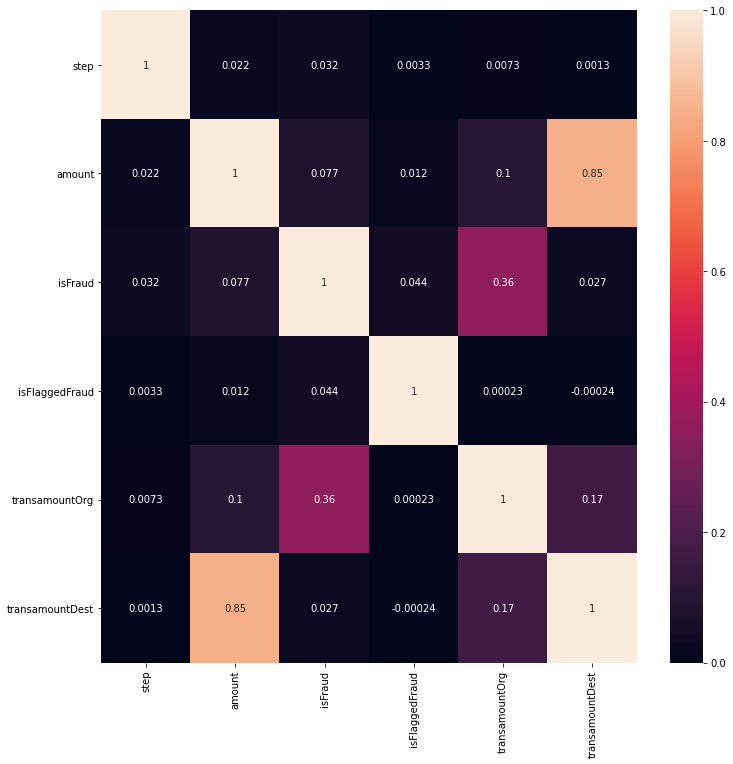

In [ ]:
# Let's check correlation between different variables

sns.heatmap(df.corr(), annot = True)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

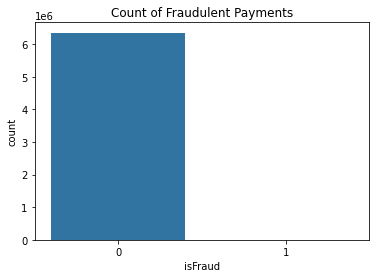

Number of normal examples:  6354407
Number of fradulent examples:  8213


In [ ]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = df.loc[df.isFraud == 1] 
df_non_fraud = df.loc[df.isFraud == 0]

sns.countplot(x="isFraud",data=df)
plt.title("Count of Fraudulent Payments")
plt.show()
print("Number of normal examples: ",df_non_fraud.isFraud.count())
print("Number of fradulent examples: ",df_fraud.isFraud.count())
#print(data.fraud.value_counts()) # does the same thing above

In [ ]:
print("Mean feature values per type",df.groupby('type')['amount','isFraud'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Mean feature values per type                  amount   isFraud
type                             
CASH_IN   168920.242004  0.000000
CASH_OUT  176273.964346  0.001840
DEBIT       5483.665314  0.000000
PAYMENT    13057.604660  0.000000
TRANSFER  910647.009645  0.007688


Fraudulent transactions are mainly for cash_out and transfer category

In [ ]:
df_cat = [ col for col in df.columns if df[col].dtype==object]

In [ ]:
print(df_cat)

['type', 'nameOrig', 'nameDest']


In [ ]:
# Using label encoder to encode categorical variables

from sklearn.preprocessing import LabelEncoder
le = {}
for column in df_cat:
    le[column] = LabelEncoder()
    df[column] = le[column].fit_transform(df[column])


In [ ]:
Y = df['isFraud']
X = df.drop(columns=['isFraud'], axis =1)

**Standardize the data**

In [ ]:
# from sklearn.prepStandardScalarrocessing import 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
SC = StandardScaler()
scaled_df = pd.DataFrame(SC.fit_transform(X), columns = X.columns)

scaled_df.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFlaggedFraud
0,-1.703042,0.952399,-0.281560,-1.318825,-0.237622,1.220490,-0.333411,-0.001586
1,-1.703042,0.952399,-0.294767,-0.538520,-0.285812,1.316232,-0.333411,-0.001586
2,-1.703042,1.693076,-0.297555,-1.185630,-0.292442,-0.408856,-0.333411,-0.001586
3,-1.703042,-0.528954,-0.297555,1.445742,-0.292442,-0.472820,-0.333411,-0.001586
4,-1.703042,0.952399,-0.278532,0.146834,-0.282221,0.109953,-0.333411,-0.001586


In [ ]:
X = scaled_df

In [ ]:
print(X.shape)
print(Y.shape)

(6362620, 8)
(6362620,)


In [ ]:
X.head()

,step,type,amount,nameOrig,nameDest,isFlaggedFraud,transamountOrg,transamountDest
0,1,3,9839.64,757869,1662094,0,9839.64,0.0
1,1,3,1864.28,2188998,1733924,0,1864.28,0.0
2,1,4,181.00,1002156,439685,0,181.00,0.0
3,1,1,181.00,5828262,391696,0,181.00,-21182.0
4,1,3,11668.14,3445981,828919,0,11668.14,0.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   step             int64  
 1   type             int64  
 2   amount           float64
 3   nameOrig         int64  
 4   nameDest         int64  
 5   isFlaggedFraud   int64  
 6   transamountOrg   float64
 7   transamountDest  float64
dtypes: float64(3), int64(5)
memory usage: 436.9 MB


In [ ]:
# Performing dimensionality reduction using PCA
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

# Limiting the number of components such that 95% of the variance is explained
# pca = PCA(0.95, svd_solver='full')
# X = pca.fit_transform(X)

# X.shape

In [ ]:
pca.explained_variance_ratio_

array([0.23018453, 0.18034707, 0.12521525, 0.12499086, 0.12446704,
       0.10473214, 0.06805479])

In [ ]:
# %% Function for plotting ROC_AUC curve

def plot_roc_auc(y_test, preds):
    '''
    Takes actual and predicted(probabilities) as input and plots the Receiver
    Operating Characteristic (ROC) curve
    '''
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

**Training supervised learning models using intrinsic features from the dataset**

In [ ]:
# k_fold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

random_forest = RandomForestClassifier(max_depth=20, n_estimators=150)
svm = SVC(gamma="auto")
logistic_regression = LogisticRegression(solver='lbfgs', max_iter=5000)
#scaled_df = scaled_df.values
#labels = Y_after_smote
# labels = Y

In [ ]:
# Testing the logistic regression classifier after performing oversampling on the training data using SMOTE 
labels = Y
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.20, random_state=42) #stratify='array-like')



In [ ]:
# The base score should be better than predicting always non-fraduelent
print("Base accuracy score we must beat is: ", 
      df_non_fraud.isFraud.count()/ np.add(df_non_fraud.isFraud.count(),df_fraud.isFraud.count()) * 100)

Base accuracy score we must beat is:  99.87091795518198


In [ ]:
# Handling the imbalance in the dataset using SMOTE
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE

print('Original dataset shape %s' % Counter(Y))

#X_before_smote = X_train
sm = SMOTE(random_state=1)

# Applying smote to dataset, result is nparray
X_after_smote, Y_after_smote = sm.fit_resample(X_train, y_train)
                                            
                                               
print('dataset shape after smote %s' % Counter(Y_after_smote))

**Logistic Regression Model**

In [ ]:
clf = logistic_regression.fit(X_after_smote, Y_after_smote)

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

Original dataset shape Counter({0: 6354407, 1: 8213})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


dataset shape after smote Counter({0: 5083503, 1: 5083503})
              precision    recall  f1-score   support

           0       1.00      0.95      0.98   1270904
           1       0.02      0.91      0.05      1620

    accuracy                           0.95   1272524
   macro avg       0.51      0.93      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



In [ ]:
# Classification report for train data

prediction_tr = clf.predict(X_after_smote)
print(classification_report(Y_after_smote, prediction_tr))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94   5083503
           1       0.95      0.92      0.94   5083503

    accuracy                           0.94  10167006
   macro avg       0.94      0.94      0.94  10167006
weighted avg       0.94      0.94      0.94  10167006



**Random Forest Model**

In [ ]:
clf = random_forest.fit(X_after_smote, Y_after_smote)

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

Original dataset shape Counter({0: 6354407, 1: 8213})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


dataset shape after smote Counter({0: 5083503, 1: 5083503})


KeyboardInterrupt: ignored

In [ ]:
# Clasification report on Train data

prediction_tr_rf = clf.predict(X_after_smote)
print(classification_report(Y_after_smote, prediction_tr_rf))

**SVM Classifier**

In [ ]:
# SVM Classifier
    
# X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.20)

clf = svm.fit(X_after_smote, Y_after_smote)
predictions = clf.predict(X_test)
    
print(classification_report(y_test, predictions))

In [ ]:
# Classification report for train data

prediction_tr_svc = clf.predict(X_after_smote)
print(classification_report(Y_after_smote, prediction_tr_svc))

**KNN Classifier**

In [ ]:
from sklearn.neighbors import KneighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5,p=1)

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

In [ ]:
# Classification report for train data

prediction_tr_knn = clf.predict(X_after_smote)
print(classification_report(Y_after_smote, prediction_tr_knn))